# Installing packages 

In [1]:
import pandas as pd
import numpy as np
import random

import os
import glob


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix , classification_report

from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import SeparableConv2D, BatchNormalization, Dropout, BatchNormalization, MaxPooling2D, Conv2D, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pylab as pl
import cv2

In [2]:
# pip install opencv-contrib-python

In [3]:
# pip install opencv-python

# Pulling the data

In [4]:
train_folder = glob.glob('/Users/palomaflores/Desktop/Machine Learning/Project/chest_xray/train/*/*')
val_folder = glob.glob('/Users/palomaflores/Desktop/Machine Learning/Project/chest_xray/val/*/*')
test_folder = glob.glob('/Users/palomaflores/Desktop/Machine Learning/Project/chest_xray/test/*/*')

In [5]:
normal = len([x for x in val_folder if 'NORMAL' in x])
normal

8

In [6]:
img_size = 180
def inp_process(file):
    data = []
    for f in file:
        try:
            #print(f)
            part = f.split('/')
            #print(part)
            #print(part[-2])
            assert part[-2] in ['NORMAL','PNEUMONIA']
            label = 1 if part[-2] == 'PNEUMONIA' else 0
            img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
            r_siz = cv2.resize(img, (img_size, img_size))
        except Exception as e:
            raise Exception(e)
        data.append([r_siz, label])
    return np.array(data)

In [7]:
train = inp_process(train_folder)
test = inp_process(test_folder)
val = inp_process(val_folder)

In [15]:
train

array([[array([[205, 207, 204, ..., 196, 201, 212],
       [204, 204, 204, ..., 203, 209, 209],
       [204, 205, 203, ..., 202, 207, 213],
       ...,
       [ 18,  13,  11, ...,  47,  49,  51],
       [ 13,  13,  11, ...,  47,  47,  49],
       [ 13,  13,  11, ...,  45,  45,  46]], dtype=uint8),
        1],
       [array([[ 0,  5, 14, ..., 51, 47, 46],
       [ 0, 12, 15, ..., 55, 56, 50],
       [ 5, 13, 19, ..., 56, 52, 50],
       ...,
       [ 0,  1, 35, ...,  0,  0,  0],
       [ 0,  0, 35, ...,  0,  0,  0],
       [ 0,  0, 31, ...,  0,  0,  0]], dtype=uint8),
        1],
       [array([[45, 45, 45, ..., 27, 25, 30],
       [45, 43, 43, ..., 27, 25, 27],
       [44, 44, 44, ..., 27, 24, 26],
       ...,
       [47, 46, 44, ..., 51, 51, 58],
       [46, 45, 43, ..., 51, 53, 59],
       [46, 45, 43, ..., 51, 53, 58]], dtype=uint8),
        1],
       ...,
       [array([[58, 68, 73, ..., 51, 42, 32],
       [55, 62, 70, ..., 45, 38, 32],
       [53, 61, 69, ..., 45, 36, 25],
     

# Splitting the data into train and test 

In [8]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [9]:
x_train = np.array(x_train) / 255.
x_val = np.array(x_val) / 255.
x_test = np.array(x_test) / 255.

In [10]:
y_train = np.array(y_train)

In [11]:
y_train.shape

(5216,)

In [12]:
y_test = np.array(y_test)
y_test.shape

(624,)

Input data should be 2 dimensional matrix. Therefore, convert np arrays to a matrix.

In [13]:
x_train= x_train.reshape(x_train.shape[0],-1)

In [14]:
x_train.shape

(5216, 32400)

In [15]:
x_test = x_test.reshape(x_test.shape[0],-1)

In [16]:
x_test.shape

(624, 32400)

In [31]:
x_train_subset = x_train[3650:4150]

In [32]:
y_train_subset = y_train[3650:4150]

# Applying SMOTE to Train Dataset

In [84]:
# pip install imbalanced-learn

     |████████████████████████████████| 206 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 6.6 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [43]:
import imblearn
from imblearn.over_sampling import SMOTE

In [44]:
sm=SMOTE(sampling_strategy='auto')

In [45]:
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [46]:
x_train_smote

array([[0.80392157, 0.81176471, 0.8       , ..., 0.17647059, 0.17647059,
        0.18039216],
       [0.        , 0.01960784, 0.05490196, ..., 0.        , 0.        ,
        0.        ],
       [0.17647059, 0.17647059, 0.17647059, ..., 0.2       , 0.20784314,
        0.22745098],
       ...,
       [0.08800144, 0.11340168, 0.12955566, ..., 0.09066389, 0.08980042,
        0.09066389],
       [0.2395231 , 0.26081981, 0.28115049, ..., 0.        , 0.        ,
        0.        ],
       [0.02294607, 0.0333761 , 0.05006416, ..., 0.        , 0.        ,
        0.        ]])

In [47]:
y_train_smote

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
y_train_smote[y_train_smote==1].shape

(3875,)

In [49]:
y_train_smote[y_train_smote==0].shape

(3875,)

# Making a SVM model 

In [48]:
model1=SVC(C = 1 , kernel = 'poly', gamma = 'auto' )

In [33]:
model1.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

#### Train Dataset 

In [34]:
predictions1_train = model1.predict(x_train)

In [35]:
accuracy_score(y_train, predictions1_train)

0.758819018404908

In [36]:
print("Classification Report: \n", classification_report(y_train, predictions1_train))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.06      0.12      1341
           1       0.75      1.00      0.86      3875

    accuracy                           0.76      5216
   macro avg       0.88      0.53      0.49      5216
weighted avg       0.82      0.76      0.67      5216



#### Test Dataset
- Accuracy score for train is better than test. This is good 

In [37]:
predictions1_test=model1.predict(x_test)

In [38]:
accuracy_score(y_test, predictions1_test)

0.6330128205128205

In [39]:
print("Classification Report: \n", classification_report(y_test, predictions1_test))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       234
           1       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.82      0.51      0.41       624
weighted avg       0.77      0.63      0.50       624



In [40]:
cm_model1=confusion_matrix(y_test, predictions1_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1_test))


Confusion Matrix: 
 [[  5 229]
 [  0 390]]


I see a lot of False Positives :

**False positives (FP):** We predicted yes, but it's actually a no. 
(Also known as a "Type I error.")

**False negatives (FN):** We predicted no, but they actually do have the disease. 
(Also known as a "Type II error.")


# APPLY SMOTE TO SVM MODEL

In [49]:
model1.fit(x_train_smote,y_train_smote)

SVC(C=1, gamma='auto', kernel='poly')

In [53]:
predictions1smt_train = model1.predict(x_train_smote)

In [54]:
# Accuracy score looks better - there is no sign of overfitting 
accuracy_score(y_train_smote, predictions1smt_train)

0.9126451612903226

In [55]:
print("Classification Report: \n", classification_report(y_train_smote, predictions1smt_train))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      3875
           1       0.92      0.90      0.91      3875

    accuracy                           0.91      7750
   macro avg       0.91      0.91      0.91      7750
weighted avg       0.91      0.91      0.91      7750



In [57]:
predictions1_test=model1.predict(x_test)

In [58]:
accuracy_score(y_test, predictions1_test)

0.8237179487179487

In [59]:
print("Classification Report: \n", classification_report(y_test, predictions1_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.68      0.74       234
           1       0.83      0.91      0.87       390

    accuracy                           0.82       624
   macro avg       0.82      0.80      0.80       624
weighted avg       0.82      0.82      0.82       624



In [60]:
cm_model1_test=confusion_matrix(y_test, predictions1_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1_test))


Confusion Matrix: 
 [[160  74]
 [ 36 354]]


# Support Vector Machine + Polynomial Kernel + Random Search:

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(x_train)
# X_train_scaled = scaler.transform(x_train)
# X_test_scaled = scaler.transform(x_test)

In [65]:
y_train_subset = y_train[3650:4150]

In [66]:
x_train_subset = x_train[3650:4150]

In [16]:
model7 = SVC(random_state=0, kernel= "poly")

In [17]:

#create a dictionary of parameters 
param_grid = {
#'min_samples_split':[3,4,5,6,7,8],
#'n_estimators': [100,200,300,400],
#'max_features': [2, 4, 'sqrt'],
#'max_depth':[1,2], 
#'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2],
'random_state':[0],
'C': [round(x,2) for x in np.arange(.01, 4, 0.2)],
'gamma': [0.01, 0.1, 1]
#'degree': [2,3,4,5,6]
}

# Create gridsearch object with various combinations of parameters
rscv = RandomizedSearchCV(model7, param_grid, cv = 3,refit = True, n_jobs=-1, verbose = 0)
#fit


In [18]:
rscv.fit(x_train_subset, y_train_subset)

RandomizedSearchCV(cv=3, estimator=SVC(kernel='poly', random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.21, 0.41, 0.61, 0.81,
                                              1.01, 1.21, 1.41, 1.61, 1.81,
                                              2.01, 2.21, 2.41, 2.61, 2.81,
                                              3.01, 3.21, 3.41, 3.61, 3.81],
                                        'gamma': [0.01, 0.1, 1],
                                        'random_state': [0]})

In [30]:
rscv.best_params_

{'random_state': 0, 'gamma': 0.01, 'C': 3.81}

In [79]:
rscv.best_estimator_

SVC(C=3.81, gamma=0.01, kernel='poly', random_state=0)

In [19]:
rscv_best_model=rscv.best_estimator_

In [20]:
rscv_best_model.fit(x_train, y_train)

SVC(C=3.81, gamma=0.01, kernel='poly', random_state=0)

#### Train Dataset

In [21]:
predictions7_train = rscv_best_model.predict(x_train)

In [22]:
accuracy_score(y_train, predictions7_train)

1.0

In [23]:
#confusion matrix with train 
cm_model7_train=confusion_matrix(y_train, predictions7_train)
cm_model7_train

array([[1341,    0],
       [   0, 3875]])

In [53]:
import seaborn as sns

Text(33.0, 0.5, 'True')

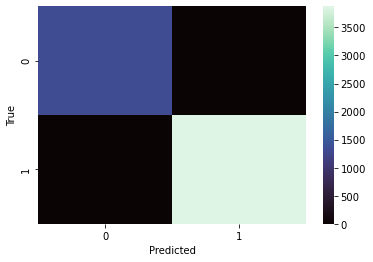

In [62]:
sns.heatmap(cm_model7_train, cmap= 'mako')
plt.xlabel('Predicted')
plt.ylabel('True')

#### Test Dataset

In [24]:
predictions7_test=rscv_best_model.predict(x_test)

In [64]:
accuracy_score(y_test, predictions7_test)

0.7548076923076923

In [75]:
cm_model7_test=confusion_matrix(y_test, predictions7_test)
cm_model7_test

array([[ 84, 150],
       [  3, 387]])

Text(33.0, 0.5, 'True')

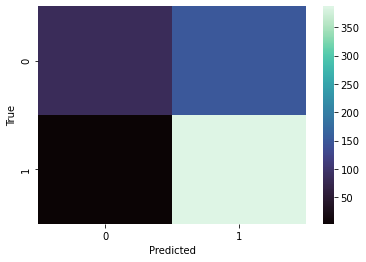

In [77]:
sns.heatmap(cm_model7_test, cmap= 'mako')
plt.xlabel('Predicted')
plt.ylabel('True')

# SVM + Polynomial Kernel + SMOTE

Taking the best parameters from the first run and using smote on the training dataset

In [65]:
mod8 = SVC(C=3.41, gamma=0.1, kernel='poly', random_state=0)

In [67]:
# SMOTE
mod8.fit(x_train_smote, y_train_smote)

SVC(C=3.41, gamma=0.1, kernel='poly', random_state=0)

In [68]:
# SMOTE
p8_train = mod8.predict(x_train_smote)

In [69]:
# SMOTE
accuracy_score(y_train_smote, p8_train)

1.0

In [70]:
# smote
cm8_train=confusion_matrix(y_train_smote, p8_train)
cm8_train

array([[3875,    0],
       [   0, 3875]])

In [87]:
predictions8_test=mod8.predict(x_test)
accuracy_score(y_test, predictions8_test)

0.7548076923076923

In [71]:
cm_model8_test=confusion_matrix(y_test, predictions8_test)
cm_model8_test

array([[  5, 229],
       [  0, 390]])

Text(33.0, 0.5, 'True')

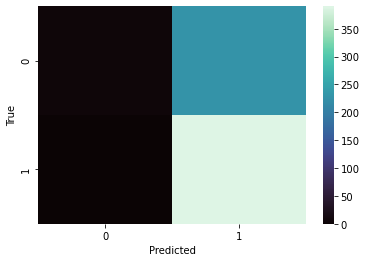

In [73]:
sns.heatmap(cm_model8_test, cmap = 'mako')
plt.xlabel('Predicted')
plt.ylabel('True')

# Support Vector Machine + RBF Kernel + Random Search:

In [25]:
model8 = SVC(random_state=0, kernel= "rbf")

In [33]:
# Create gridsearch object with various combinations of parameters

#create a dictionary of parameters 
param_grid = {
#'min_samples_split':[3,4,5,6,7,8],
#'n_estimators': [100,200,300,400],
#'max_features': [2, 4, 'sqrt'],
#'max_depth':[1,2], 
#'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2],
'random_state':[0],
'C': [round(x,2) for x in np.arange(.01, 4, 0.2)],
'gamma': [0.01, 0.1, 1]
#'degree': [2,3,4,5,6]
}

rbfsv = RandomizedSearchCV(model8, param_grid, cv = 3,refit = True, n_jobs=-1, verbose = 0)
#fit

In [34]:
rbfsv.fit(x_train_subset, y_train_subset)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.21, 0.41, 0.61, 0.81,
                                              1.01, 1.21, 1.41, 1.61, 1.81,
                                              2.01, 2.21, 2.41, 2.61, 2.81,
                                              3.01, 3.21, 3.41, 3.61, 3.81],
                                        'gamma': [0.01, 0.1, 1],
                                        'random_state': [0]})

In [71]:
rbfsv.best_params_

{'random_state': 0, 'gamma': 0.01, 'C': 2.61}

In [72]:
rbfsv.best_estimator_

SVC(C=2.61, gamma=0.01, random_state=0)

In [35]:
rbfsv_best_model=rbfsv.best_estimator_
rbfsv_best_model.fit(x_train, y_train)

SVC(C=2.61, gamma=0.01, random_state=0)

#### TRAIN DATASET

In [36]:
predictions8_train = rbfsv_best_model.predict(x_train) 

In [38]:
accuracy_score(y_train, predictions8_train)

1.0

In [39]:
print(confusion_matrix(y_train,predictions8_train))

[[1341    0]
 [   0 3875]]


#### TEST DATASET

In [40]:
predictions8_test=rbfsv_best_model.predict(x_test)

In [41]:
accuracy_score(y_test, predictions8_test)

0.6330128205128205

In [42]:
cm_model8_test=confusion_matrix(y_test, predictions8_test)
cm_model8_test
print(confusion_matrix(y_test,predictions8_test))
print(classification_report(y_test,predictions8_test))

[[  5 229]
 [  0 390]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       234
           1       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.82      0.51      0.41       624
weighted avg       0.77      0.63      0.50       624



Text(33.0, 0.5, 'True')

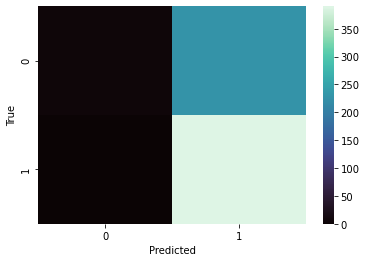

In [64]:
sns.heatmap(cm_model8_test, cmap = 'mako')
plt.xlabel('Predicted')
plt.ylabel('True')